## Hypothesis testing -in practice

### 1. Introduction

In this notebook, we will learn how to perform hypothesis testing using the `scipy.stats` module. We will learn how to perform the following tests:

- One-sample t-test
- Two-sample t-test
- Paired t-test
- Proportion test
- Chi-square test

### 2. One-sample t-test

The one-sample t-test is used to determine **whether a sample comes from a population with a specific mean**. 

For example, we might want to know whether a sample of 100 people has a mean age of 30. We can use a one-sample t-test to determine whether this is true.

The null hypothesis for a one-sample t-test is that the sample comes from a population with the specified mean. The alternative hypothesis is that the sample does not come from a population with the specified mean.

#### Python 
We can perform a one-sample t-test using the `ttest_1samp()` function from the `scipy.stats` module. The function takes two arguments: the sample and the population mean. It returns the t-statistic and the p-value.
 
Let's perform a one-sample t-test to determine whether a sample of 100 people has a mean age of 30. We will use the `ttest_1samp()` function to perform the test.



Mean:  30.134103782061
T-statistic:  0.304693667843293
P-value:  0.7612390731403889
Is the result significant?  False


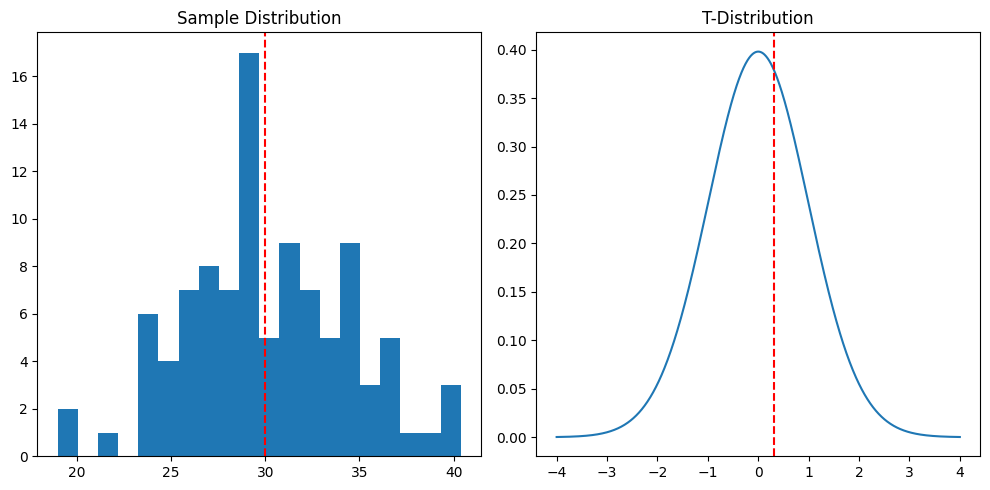

In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

sample = np.random.normal(loc=30, scale=4, size=100) # generating our sample
test_mean = 30 # our null hypothesis is that the mean is 30
alpha = 0.05 # our significance level is 5%
result= stats.ttest_1samp(sample, test_mean)


# plot a histogram of our sample, add a vertical dashed line for our expected mean
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# plot a histogram of our sample, add a vertical dashed line for our expected mean
axs[0].hist(sample, bins=20)
axs[0].axvline(test_mean, linestyle='dashed', color='red')
axs[0].set_title('Sample Distribution')

# Perform t-test

print("Mean: ", np.mean(sample))
print("T-statistic: ", result[0])
print("P-value: ", result[1])
print("Is the result significant? ", result[1] < alpha)

# Generate t-distribution
df = len(sample) - 1  # degrees of freedom for the t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# plot the t-distribution, add a vertical dashed line for our t-statistic
axs[1].plot(x, y)
axs[1].axvline(result[0], linestyle='dashed', color='red')
axs[1].set_title('T-Distribution')

plt.tight_layout()
plt.show()



### 3. Two-sample t-test

The two-sample t-test is used to determine **whether two samples come from populations with the same mean**.

For example, we might want to know whether a sample of 100 people has a mean age of 30 and a sample of 100 people has a mean age of 35. We can use a two-sample t-test to determine whether these two samples come from populations with the same mean.

The null hypothesis for a two-sample t-test is that the two samples come from populations with the same mean. The alternative hypothesis is that the two samples come from populations with different means.

#### Python
We can perform a two-sample t-test using the `ttest_ind()` function from the `scipy.stats` module. The function takes two arguments: the two samples. It returns the t-statistic and the p-value.

Let's perform a two-sample t-test to determine whether a sample of 100 people has a mean age of 30 and a sample of 100 people has a mean age of 35. We will use the `ttest_ind()` function to perform the test.


Mean of sample 1:  30.020442436239446
Mean of sample 2:  35.46756003194099
T-statistic:  -9.557178267409553
P-value:  4.8900329347293416e-18
Is the difference between means significant?  True


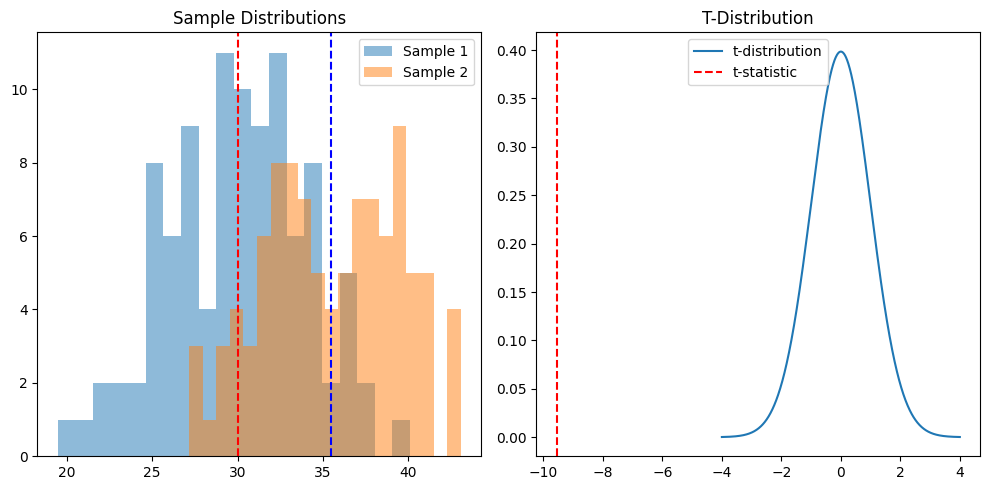

In [3]:
import scipy.stats as stats
import numpy as np

sample1 = np.random.normal(loc=30, scale=4, size=100) # generating our sample 1
sample2 = np.random.normal(loc=35, scale=4, size=100) # generating our sample 2
alpha = 0.05 # our significance level is 5%
result= stats.ttest_ind(sample1, sample2)

fig, axs = plt.subplots(1, 2, figsize=(10,5))

# plot a histogram of our two samples. add vertical lines for the expected means
axs[0].hist(sample1, bins=20, alpha=0.5, label='Sample 1')
axs[0].hist(sample2, bins=20, alpha=0.5, label='Sample 2')
axs[0].axvline(np.mean(sample1), linestyle='dashed', color='red')
axs[0].axvline(np.mean(sample2), linestyle='dashed', color='blue')
axs[0].set_title('Sample Distributions')
axs[0].legend()

print("Mean of sample 1: ", np.mean(sample1))
print("Mean of sample 2: ", np.mean(sample2))

print("T-statistic: ", result[0])
print("P-value: ", result[1])
print("Is the difference between means significant? ", result[1] < alpha)

# Generate t-distribution
df = len(sample1) + len(sample2) - 2  # degrees of freedom for the t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# plot the t-distribution, add a vertical dashed line for our t-statistic
axs[1].plot(x, y, label='t-distribution')
axs[1].axvline(result[0], linestyle='dashed', color='red', label='t-statistic')
axs[1].set_title('T-Distribution')
axs[1].legend()

plt.tight_layout()
plt.show()


### 4. Paired t-test

The paired t-test is used to determine **whether two samples come from populations with the same mean**, *when every observation in one sample can be paired with an observation in the other sample*. 

For example, we might want to compare student test results before and after a training course. 

The null hypothesis is that the trainning course has no effect on student test results. 

#### Python

We can perform a paired t-test using the `ttest_rel()` function from the `scipy.stats` module. The function takes two arguments: the two samples. It returns the t-statistic and the p-value.

Let's perform a paired t-test to determine whether a sample of 100 people has a mean age of 30 and a sample of 100 people has a mean age of 35. We will use the `ttest_rel()` function to perform the test.



Mean of sample 1:  29.690879290401114
Mean of sample 2:  35.19340099103861
T-statistic:  -6.122181402204984
P-value:  1.5166824661324002e-07
Is the difference between means significant?  True


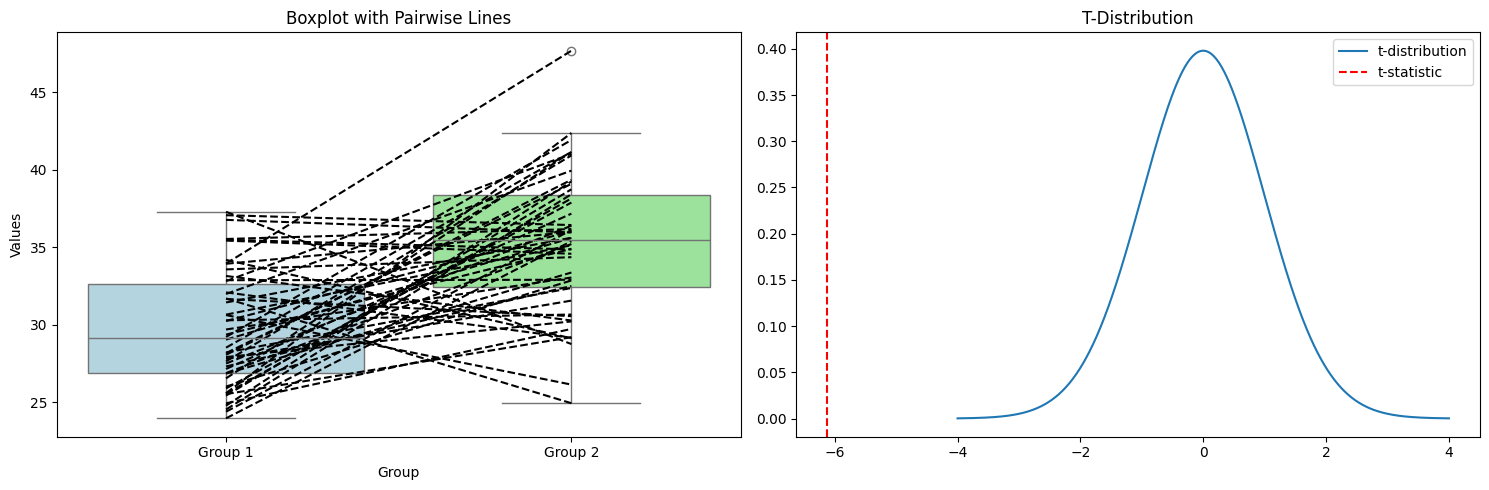

In [4]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

sample1 = np.random.normal(loc=30, scale=4, size=50)
sample2 = np.random.normal(loc=35, scale=4, size=50)

# plot boxplot of the two samples with points and lines betweeen pairs of points
# Combine the data into a DataFrame
data = {'Group': ['Group 1'] * len(sample1) + ['Group 2'] * len(sample2),
        'Values': np.concatenate([sample1, sample2])}
df = pd.DataFrame(data)


fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Create the boxplot using Seaborn
sns.boxplot(x='Group', y='Values', data=df, ax=axs[0], notch=False, palette=['lightblue', 'lightgreen'])

# Add lines between every pair of observations
for i in range(len(sample1)):
    axs[0].plot([0, 1], [sample1[i], sample2[i]], 'k--')

# Set y-axis label
axs[0].set_ylabel('Values')

# Add a title
axs[0].set_title('Boxplot with Pairwise Lines')

result= stats.ttest_rel(sample1, sample2)

print("Mean of sample 1: ", np.mean(sample1))
print("Mean of sample 2: ", np.mean(sample2))
print("T-statistic: ", result[0])
print("P-value: ", result[1])

print("Is the difference between means significant? ", result[1] < alpha)

# Generate t-distribution
df = len(sample1) + len(sample2) - 2  # degrees of freedom for the t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# plot the t-distribution, add a vertical dashed line for our t-statistic
axs[1].plot(x, y, label='t-distribution')
axs[1].axvline(result[0], linestyle='dashed', color='red', label='t-statistic')
axs[1].set_title('T-Distribution')
axs[1].legend()

plt.tight_layout()
plt.show()

### 5. Proportion test

####  5.1 The binomial distribution

The proportion test is used to determine **whether a sample comes from a population with a specific proportion**.

If you have access to the number of successes and the number of trials, you can use binomial distribution to determine whether a sample comes from a population with a specific proportion.

#### Python

We can perform a proportion test using the `binom_test()` function from the `scipy.stats` module. The function takes two arguments: the number of successes and the number of trials. It returns the p-value.


p-value: 2.139250662619602e-11


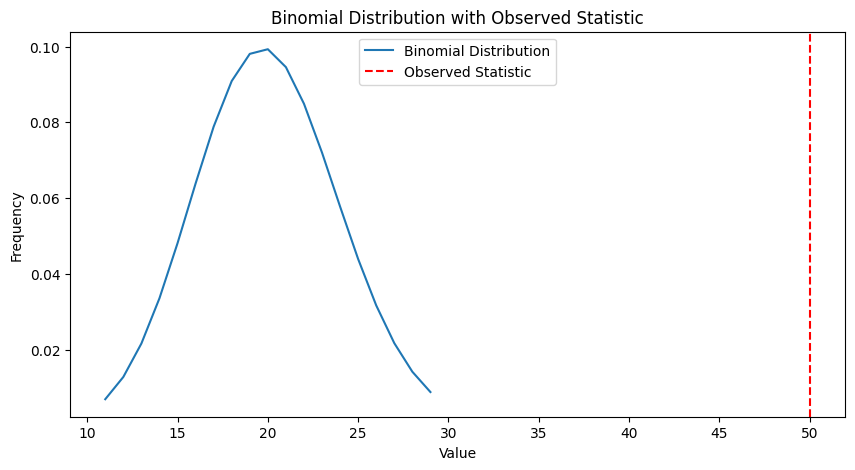

In [7]:
from scipy.stats import binomtest

from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

number_of_successes = 50
number_of_trials = 100
expected_probability_of_success = 0.2

p_value = binomtest(number_of_successes, number_of_trials, expected_probability_of_success, alternative='two-sided')

print(f"p-value: {p_value.pvalue}")

# Generate a range of values around the mean
values = np.arange(binom.ppf(0.01, number_of_trials, expected_probability_of_success),
                   binom.ppf(0.99, number_of_trials, expected_probability_of_success))

# Generate the binomial distribution for these values
binomial_distribution = binom.pmf(values, number_of_trials, expected_probability_of_success)

# Create the plot
plt.figure(figsize=(10,5))
plt.plot(values, binomial_distribution, label='Binomial Distribution')

# Add a vertical line for the observed statistic
plt.axvline(number_of_successes, linestyle='dashed', color='red', label='Observed Statistic')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Binomial Distribution with Observed Statistic')
plt.legend()

plt.show()


#### 5.2 The normal distribution

In some cases, you might not have access to the number of successes and the number of trials but only the resulting proportion. In this case you can use the normal distribution to determine whether a sample comes from a population with a specific proportion.

#### Python

We can perform a proportion test using the `proportions_ztest()` function from the `statsmodels.stats.proportion` module. The function takes two arguments: the number of successes and the number of trials. It returns the z-statistic and the p-value.



In [11]:
from statsmodels.stats.proportion import proportions_ztest

# Define the sample size and number of successes
n = 200 # sample size
successes = 120 # number of successes

# Define the null hypothesis proportion
p_null = 0.4

# define our significance level
alpha = 0.05

# Calculate the p-value
test_result = proportions_ztest(count=successes, nobs=n, value=p_null, alternative='two-sided')
p_value = test_result[1]

print(f"p-value: {p_value}")
print(f"test statistic: {test_result[0]}")
print(f"is the result significant? {p_value < alpha}")


p-value: 7.764036537930729e-09
test statistic: 5.773502691896256
is the result significant? True



### 6. Chi-square test

The chi-square test is used to determine **whether two categorical variables are independent**.

#### Example

Let's consider a scenario where we want to determine if there is a relationship between gender and smoking habits. We have collected data from a sample of individuals and created a contingency table to summarize the data:

|         | Non-Smoker | Smoker |
|---------|------------|--------|
| Male    | 200        | 150    |
| Female  | 250        | 300    |

To perform the chi-squared test, we can use the `scipy.stats` module in Python, . Here's the code to calculate the chi-squared test statistic and p-value:


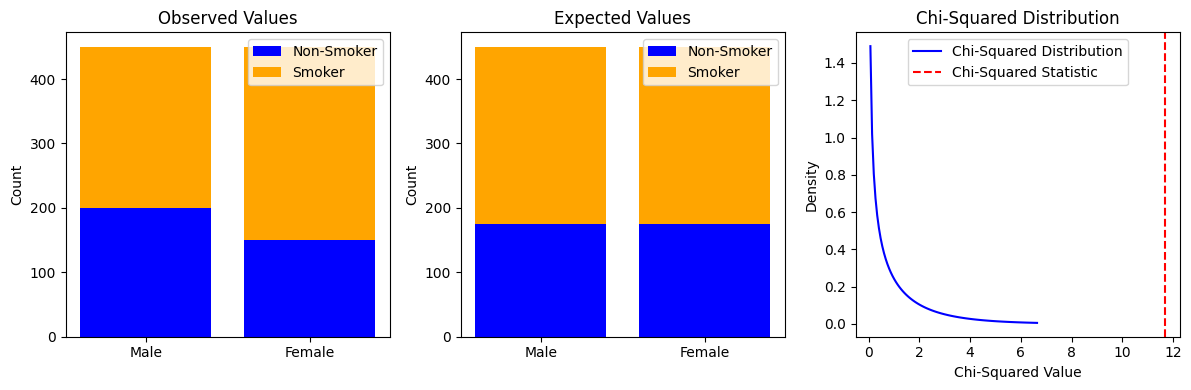

Chi-squared Statistic:  11.688311688311689
Degrees of Freedom:  1
P-value:  0.0006289394206545618
Is the result significant at p < 0.05? True


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Create the contingency table of the relationship between smoking and gender
observed = np.array([[200, 150], [250, 300]])

# Calculate the expected frequencies
row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
total = observed.sum()
expected = np.outer(row_totals, col_totals) / total

# Calculate the chi-squared test statistic
chi2_statistic = np.sum((observed - expected)**2 / expected)

# Set up the figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the observed values
axs[0].bar([0, 1], observed[0], color='blue', label='Non-Smoker')
axs[0].bar([0, 1], observed[1], bottom=observed[0], color='orange', label='Smoker')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Male', 'Female'])
axs[0].set_ylabel('Count')
axs[0].set_title('Observed Values')
axs[0].legend()

# Plot the expected values
axs[1].bar([0, 1], expected[0], color='blue', label='Non-Smoker')
axs[1].bar([0, 1], expected[1], bottom=expected[0], color='orange', label='Smoker')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Male', 'Female'])
axs[1].set_ylabel('Count')
axs[1].set_title('Expected Values')
axs[1].legend()

# Plot the chi-squared distribution
df = (observed.shape[0] - 1) * (observed.shape[1] - 1)
x = np.linspace(0, chi2.ppf(0.99, df), 100)
axs[2].plot(x, chi2.pdf(x, df), 'b-', label='Chi-Squared Distribution')
axs[2].axvline(chi2_statistic, color='red', linestyle='--', label='Chi-Squared Statistic')
axs[2].set_xlabel('Chi-Squared Value')
axs[2].set_ylabel('Density')
axs[2].set_title('Chi-Squared Distribution')
axs[2].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

print("Chi-squared Statistic: ", chi2_statistic)
print("Degrees of Freedom: ", df)
print("P-value: ", 1 - chi2.cdf(chi2_statistic, df))
print(f"Is the result significant at p < 0.05? {1 - chi2.cdf(chi2_statistic, df) < 0.05}")

### In practice

When you don't have to use the `chi2.ppf()` function, resort directly to the `chi2_contingency()` function. It will return the chi-squared test statistic, the p-value, the degrees of freedom, and the expected frequencies.

In [27]:
import numpy as np
from scipy.stats import chi2_contingency

# Create the contingency table
observed = np.array([[200, 150], [250, 300]])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(observed)

# Print the results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Squared Statistic: 11.225454545454546
P-value: 0.0008068301048482678


## Summary

In this notebook, we learned how to perform hypothesis testing using the `scipy.stats` module. We learned how to perform the following tests:

- One-sample t-test
- Two-sample t-test
- Paired t-test
- Chi-square test

